# Coefficient for Gambler's Ruin probability on exact time

In [1]:
from math import sqrt
from scipy.special import binom
from math import factorial
import numpy as np
################
catalan_number = lambda n : (1 / (n+1)) * binom(2*n, n)
################
catalan_triangle = lambda n, m : int(max(0, binom(n+m, m) - binom(n+m, m-1)))
#c = lambda b, t : int(max(0, binom(t+2*b, b) - binom(t+2*b, b-1)))
#c = lambda b, t : int(max(0, binom(b+2*t, t) - binom(b+2*t, t-1)))
###############
#c = lambda b, t : 0  if  (b==0) or (t==0)    else    binom((b-1)+2*(t-1), t-1) - binom((b-1)+2*(t-1), t-2)
#c = lambda b, t :  binom(b+2*t, t) - binom(b+2*t, t-1)
#c = lambda b, t : int(max(0, binom((b-1)+2*((t+1)//2-1), (t+1)//2-1) - binom((b-1)+2*((t+1)//2-1), (t+1)//2-2)))
#c = lambda b, t :  catalan_triangle((t+b)//2-1, (t+b)//2-b)
###############
#FINAL FORMULA !!!!
#c = lambda b, t : 0  if ((b>t) or (b==0) or ((b+t)%2) )   else    binom((b-1)+2*((t-b+2)//2-1), (t-b+2)//2-1) - binom((b-1)+2*((t-b+2)//2-1), (t-b+2)//2-2)
c = lambda b, t :  0  if ((b>t) or (b==0) or ((b+t)%2) )   else    catalan_triangle((t+b)/2-1, (t-b)/2)
###############
b_arr = range(0,10)
t_arr = range(0,20)
c_arr = np.zeros((10,20), dtype='int')
for b in b_arr:
  for t in t_arr:
    c_arr[b][t] = c(b, t)
np.set_printoptions(linewidth=450)
print(c_arr)


[[    0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     1     0     2     0     5     0    14     0    42     0   132     0   429     0  1430     0  4862]
 [    0     0     1     0     2     0     5     0    14     0    42     0   132     0   429     0  1430     0  4862     0]
 [    0     0     0     1     0     3     0     9     0    28     0    90     0   297     0  1001     0  3432     0 11934]
 [    0     0     0     0     1     0     4     0    14     0    48     0   165     0   572     0  2002     0  7072     0]
 [    0     0     0     0     0     1     0     5     0    20     0    75     0   275     0  1001     0  3640     0 13260]
 [    0     0     0     0     0     0     1     0     6     0    27     0   110     0   429     0  1638     0  6188     0]
 [    0     0     0     0     0     0     0     1     0     7     0    35     0   154     0   637     0  2548     0  9996]
 [    0     0   

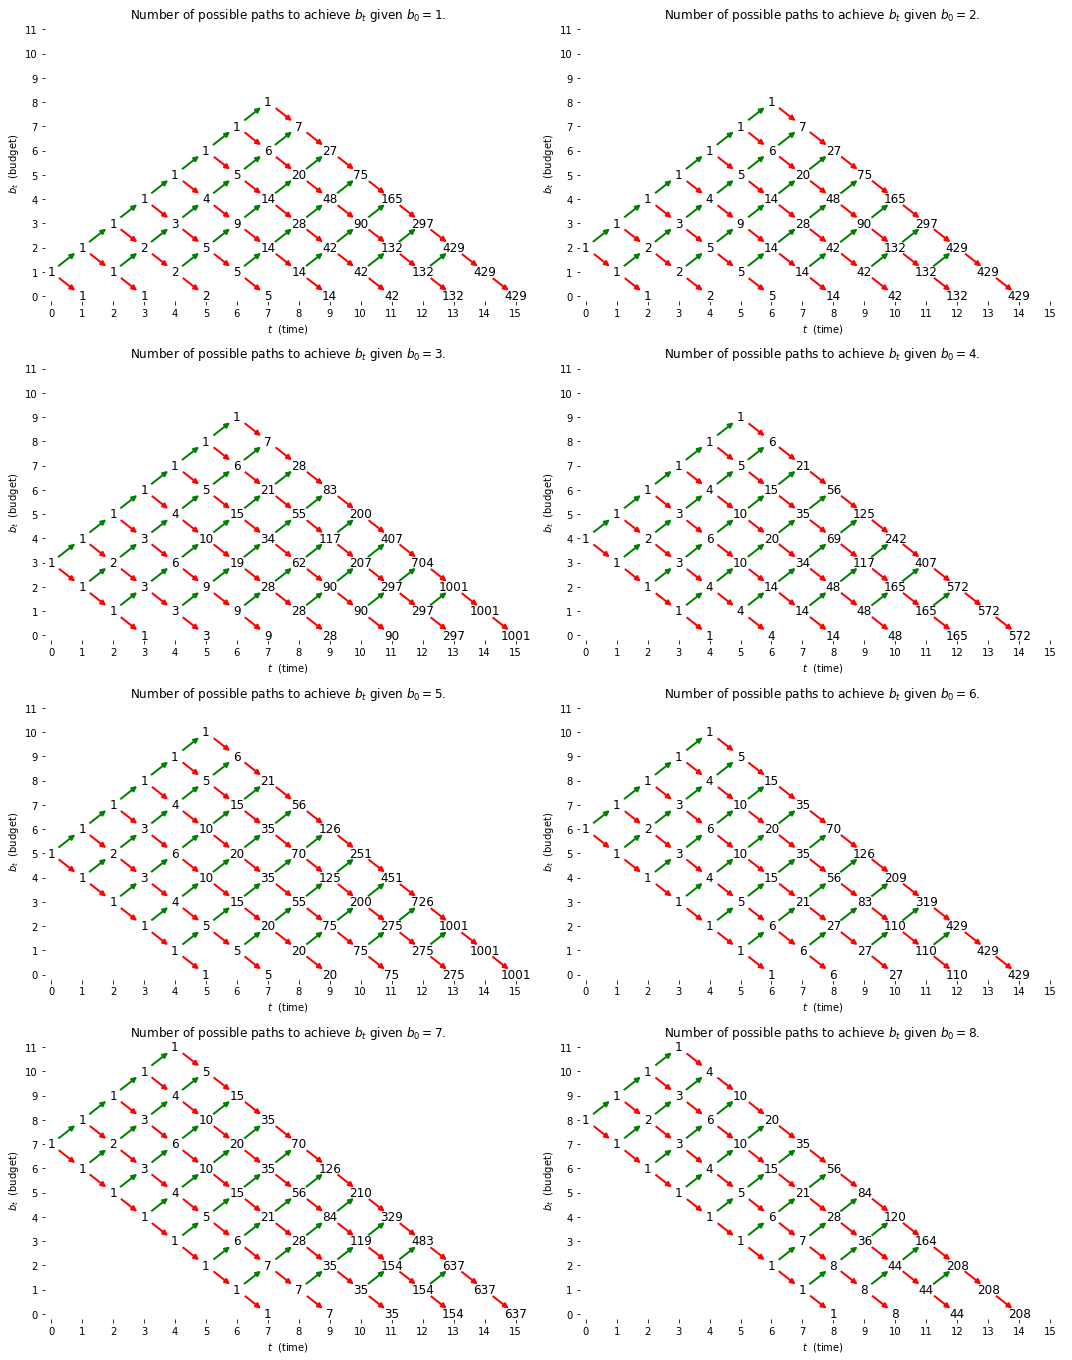

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#from google.colab import files


t_max = 15
b_0_max = 8
b_max_max = (b_0_max + t_max) // 2

fig, ax = plt.subplots(b_0_max//2, 2, figsize=(15,19))

for k, b_0 in enumerate(range(1, b_0_max+1)):

    k_y = k%2
    k_x = k//2

    b_max = (b_0 + t_max) // 2

    up_steps = b_max - b_0
    dw_steps = t_max - up_steps

    G = nx.DiGraph()

    pos={}
    labels={}

    for i in range(0, up_steps+1):
        for j in range(0, dw_steps+1):
            t = j + i
            b = b_0 + i - j
            if (b >= 0):
                G.add_node(f'({t},{b})', pos=(t,b))
                pos[f'({t},{b})'] = (t,b)
            if (i > 0) and (b > 1):
                G.add_edge(f'({t-1},{b-1})', f'({t},{b})', color='g', weight=2, style='solid')
            if (j > 0) and (b >= 0):
                G.add_edge(f'({t-1},{b+1})', f'({t},{b})', color='r', weight=2, style='dotted')

    node = f'({0},{b_0})'
    G.nodes[node]['catalan_value'] = 1
    labels[node] = 1

    for t in range(1, t_max+1):
        for b in range(0, b_max+1):
            node = f'({t},{b})'
            if node in G:
                s = 0
                for pred in G.predecessors(node):
                    s += G.nodes[pred]['catalan_value']
                    G.nodes[node]['catalan_value'] = s
                    labels[node] = str(s)

    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    styles = [G[u][v]['style'] for u,v in edges]

    nx.draw_networkx_nodes(G, pos, labels, node_color='w', ax=ax[k_x][k_y])
    nx.draw_networkx_edges(G, pos, edge_color=colors, width=weights, ax=ax[k_x][k_y])
    nx.draw_networkx_labels(G, pos, labels, ax=ax[k_x][k_y]) #font_size=16

    ax[k_x][k_y].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    ax[k_x][k_y].set_xticks(range(0, t_max+1))
    ax[k_x][k_y].set_yticks(range(0, b_max_max+1))

    ax[k_x][k_y].set_xlim(-0.2, t_max+0.5)
    ax[k_x][k_y].set_ylim(-0.2, b_max_max+0.2)

    ax[k_x][k_y].spines['top'].set_visible(False)
    ax[k_x][k_y].spines['right'].set_visible(False)
    ax[k_x][k_y].spines['bottom'].set_visible(False)
    ax[k_x][k_y].spines['left'].set_visible(False)

    ax[k_x][k_y].grid(which='both')
    ax[k_x][k_y].grid(which='minor', alpha=0.2)
    ax[k_x][k_y].grid(which='major', alpha=0.7)

    ax[k_x][k_y].set_xlabel('$t$  (time)')
    ax[k_x][k_y].set_ylabel('$b_t$  (budget)')
    ax[k_x][k_y].set_title(f'Number of possible paths to achieve $b_t$ given $b_0 = {b_0}$.')

#fig.suptitle('Number of possible paths from a given initial budget to achieve another budget level.')
fig.tight_layout()

#plt.savefig('combinations.pdf', bbox_inches='tight')
#files.download('combinations.pdf')

plt.show()



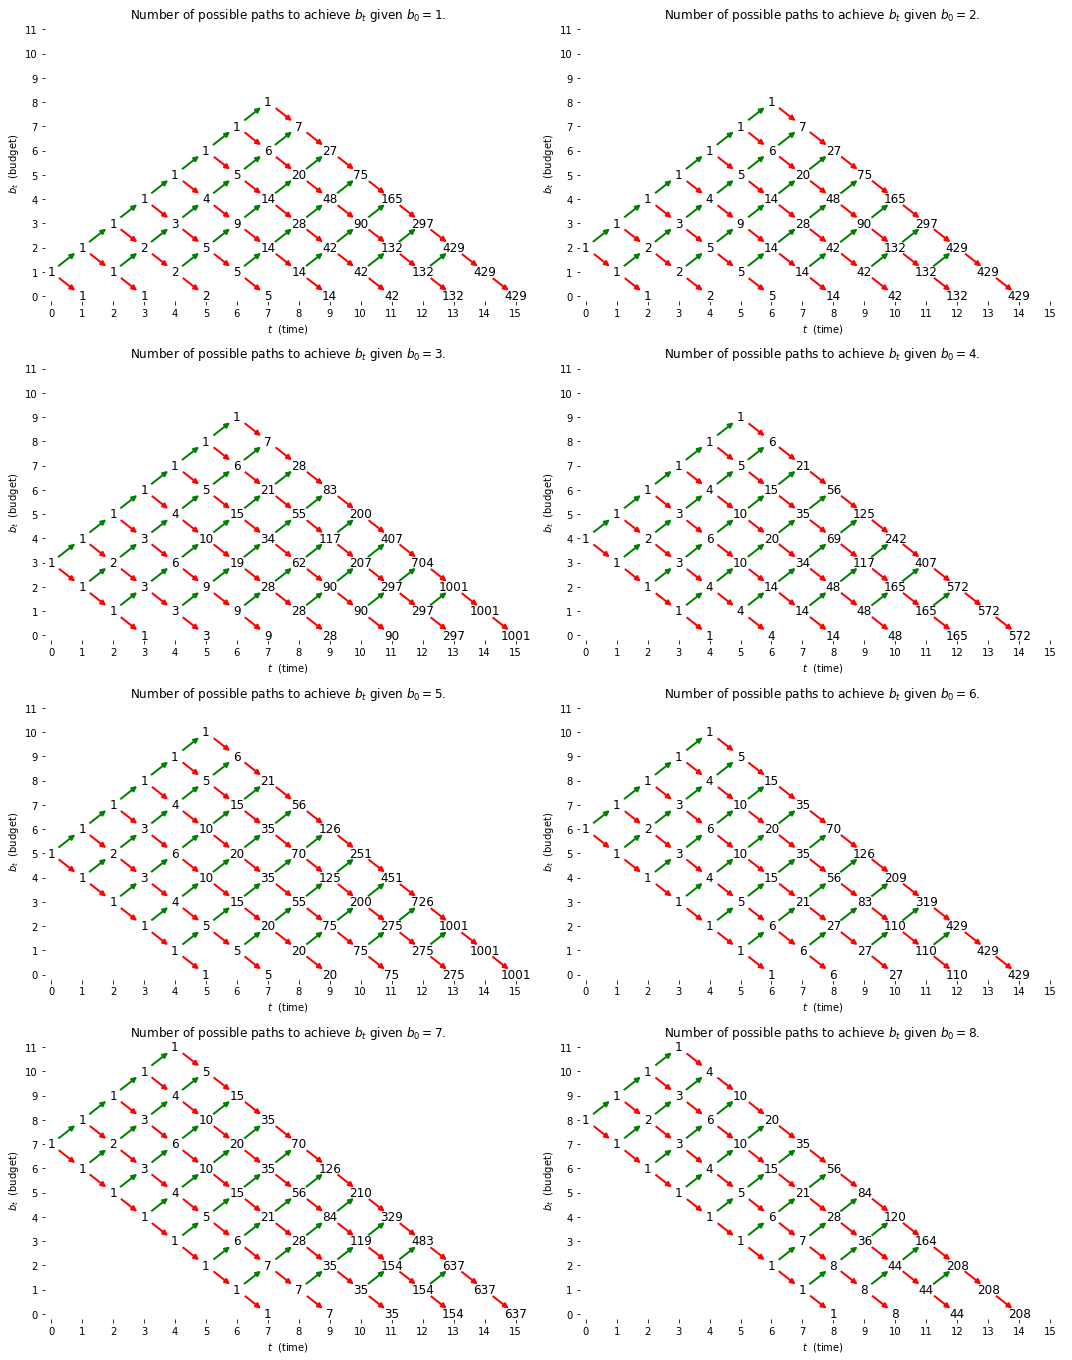

In [3]:
t_max = 15
b_0_max = 8
b_max_max = (b_0_max + t_max) // 2

fig, ax = plt.subplots(b_0_max//2, 2, figsize=(15,19))

for k, b_0 in enumerate(range(1, b_0_max+1)):

  k_y = k%2
  k_x = k//2

  b_max = (b_0 + t_max) // 2

  up_steps = b_max - b_0
  dw_steps = t_max - up_steps

  G = nx.DiGraph()

  pos={}
  labels={}

  for i in range(0, up_steps+1):
    for j in range(0, dw_steps+1):
      t = j + i
      b = b_0 + i - j
      if (b >= 0):
        G.add_node(f'({t},{b})', pos=(t,b))
        pos[f'({t},{b})'] = (t,b)
      if (i > 0) and (b > 1):
        G.add_edge(f'({t-1},{b-1})', f'({t},{b})', color='g', weight=2, style='solid')
      if (j > 0) and (b >= 0):
        G.add_edge(f'({t-1},{b+1})', f'({t},{b})', color='r', weight=2, style='dotted')

  node = f'({0},{b_0})'
  G.nodes[node]['catalan_value'] = 1
  labels[node] = 1

  for t in range(1, t_max+1):
    for b in range(0, b_max+1):
      node = f'({t},{b})'
      if node in G:
        s = 0
        for pred in G.predecessors(node):
          s += G.nodes[pred]['catalan_value']
          G.nodes[node]['catalan_value'] = s
          labels[node] = str(s)

  edges = G.edges()
  colors = [G[u][v]['color'] for u,v in edges]
  weights = [G[u][v]['weight'] for u,v in edges]
  styles = [G[u][v]['style'] for u,v in edges]

  nx.draw_networkx_nodes(G, pos, labels, node_color='w', ax=ax[k_x][k_y])
  nx.draw_networkx_edges(G, pos, edge_color=colors, width=weights, ax=ax[k_x][k_y])
  nx.draw_networkx_labels(G, pos, labels, ax=ax[k_x][k_y]) #font_size=16

  ax[k_x][k_y].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

  ax[k_x][k_y].set_xticks(range(0, t_max+1))
  ax[k_x][k_y].set_yticks(range(0, b_max_max+1))

  ax[k_x][k_y].set_xlim(-0.2, t_max+0.5)
  ax[k_x][k_y].set_ylim(-0.2, b_max_max+0.2)

  ax[k_x][k_y].spines['top'].set_visible(False)
  ax[k_x][k_y].spines['right'].set_visible(False)
  ax[k_x][k_y].spines['bottom'].set_visible(False)
  ax[k_x][k_y].spines['left'].set_visible(False)

  ax[k_x][k_y].grid(which='both')
  ax[k_x][k_y].grid(which='minor', alpha=0.2)
  ax[k_x][k_y].grid(which='major', alpha=0.7)

  ax[k_x][k_y].set_xlabel('$t$  (time)')
  ax[k_x][k_y].set_ylabel('$b_t$  (budget)')
  ax[k_x][k_y].set_title(f'Number of possible paths to achieve $b_t$ given $b_0 = {b_0}$.')

#fig.suptitle('Number of possible paths from a given initial budget to achieve another budget level.')
fig.tight_layout()

#plt.savefig('combinations.pdf', bbox_inches='tight')
#files.download('combinations.pdf')

plt.show()

